In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

import pickle

with open('calibration.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
    mtx = data['mtx']
    dist = data['dist']

In [19]:
def show_two_images(img1, label1, img2, label2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(label1, fontsize=50)
    ax2.imshow(img2)
    ax2.set_title(label2, fontsize=50)

def warp_image(img, M):
    shape = img.shape[0:2][::-1]
    return cv2.warpPerspective(img, M, shape, flags=cv2.INTER_LINEAR)


def draw_polygon(img, points, color=[255, 0, 0], thickness=5):
    points = np.append(points, [points[0]], axis=0)
    for i in range(points.shape[0]  - 1):
        cv2.line(img, tuple(points[i]), tuple(points[i+1]), color, thickness)
        
def undistort_image(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

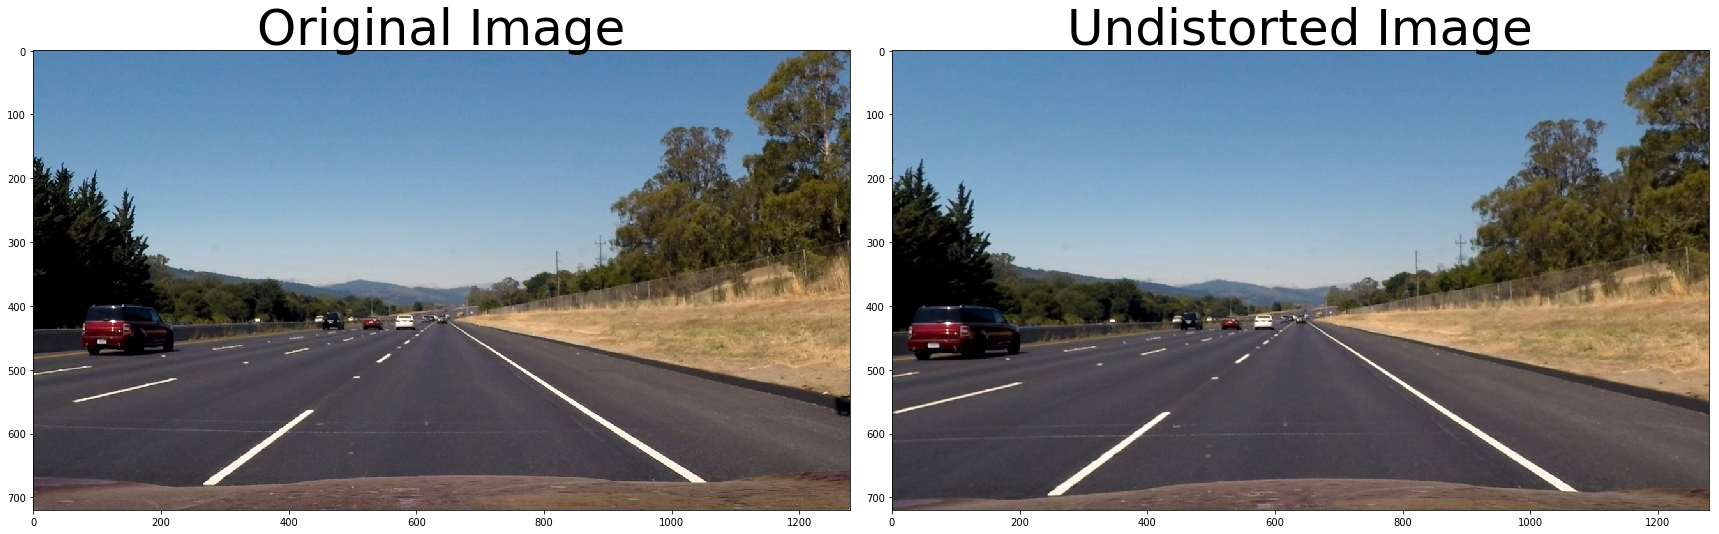

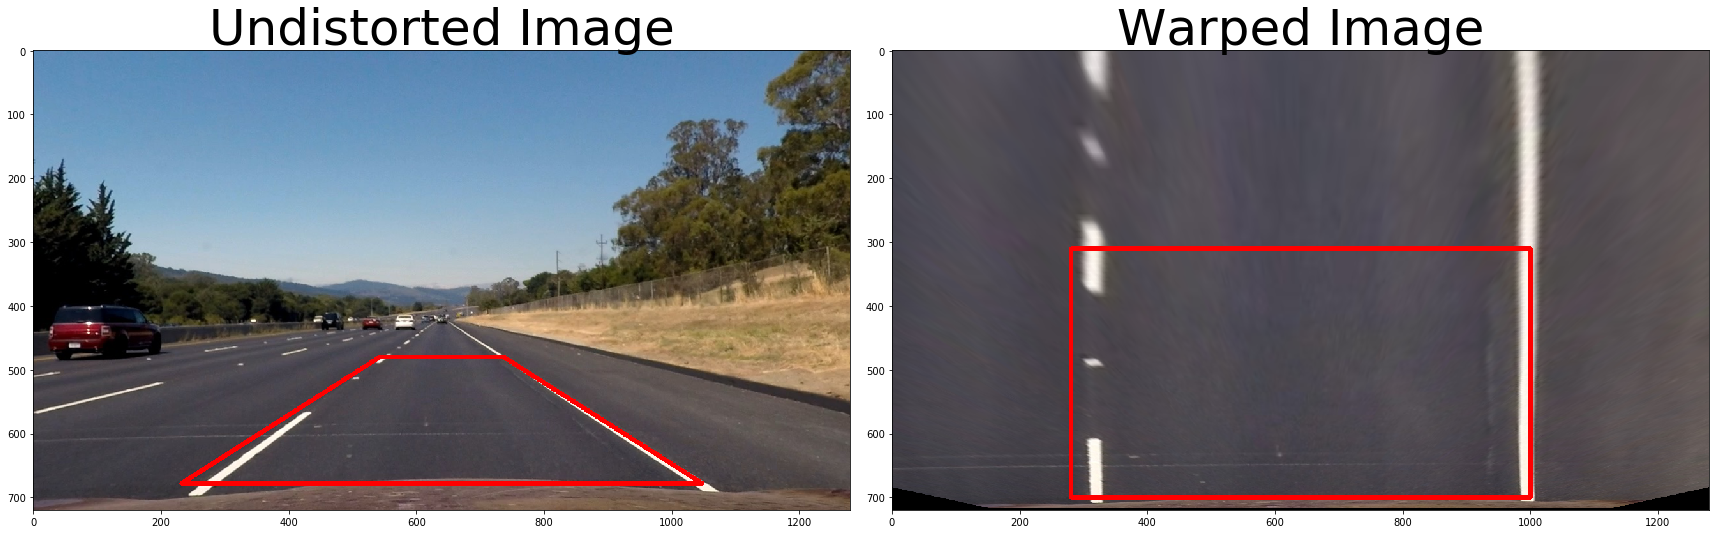

In [25]:
img = mpimg.imread('test_images/straight_lines2.jpg')


undistorted = undistort_image(img)
show_two_images(img, "Original Image", undistorted, "Undistorted Image")

#src = np.float32([[253, 686], [604, 444], [676, 444], [1027, 686]])
#dst = np.float32([[280, 700], [280, 10], [1000, 10], [1000, 700]])

src = np.float32([[232, 678], [543, 480], [737, 480], [1048, 678]])
dst = np.float32([[280, 700], [280, 310], [1000, 310], [1000, 700]])


M = cv2.getPerspectiveTransform(src, dst) 
Minv = cv2.getPerspectiveTransform(dst, src)


warped = warp_image(undistorted, M)

draw_polygon(undistorted, src)
draw_polygon(warped, dst)

show_two_images(undistorted, "Undistorted Image", warped, "Warped Image")

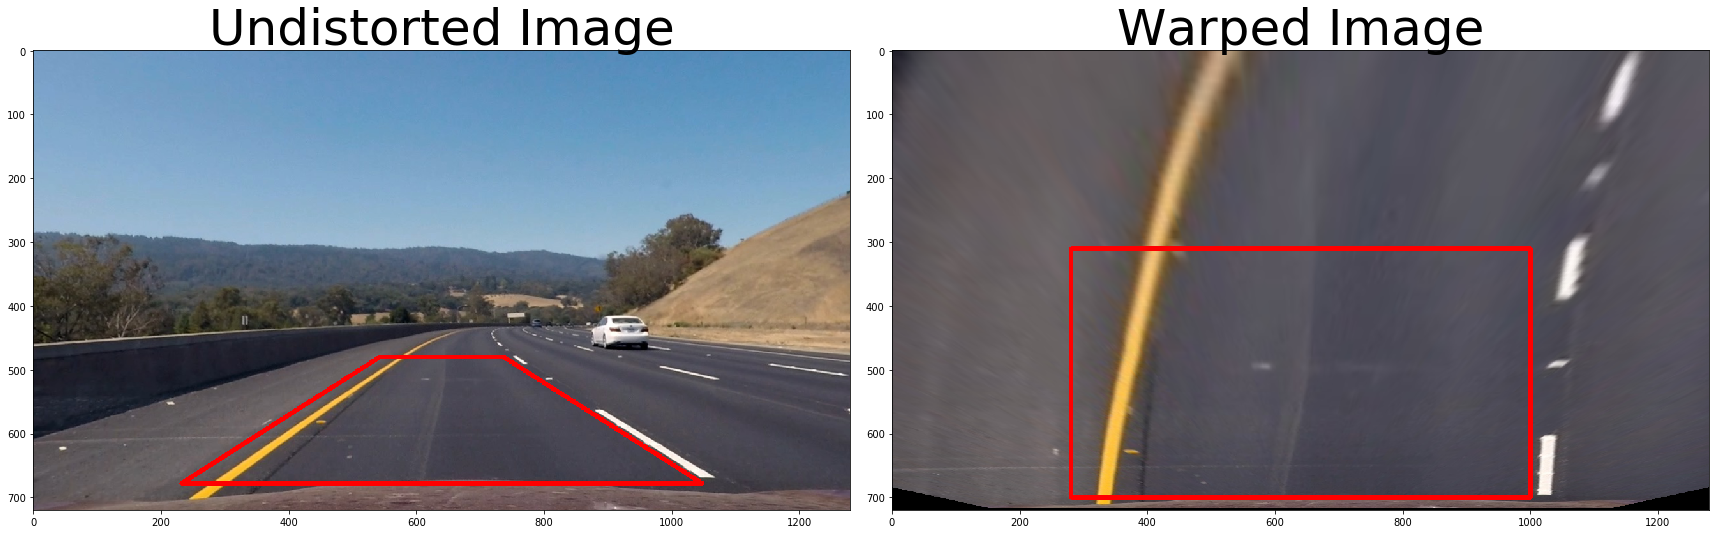

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


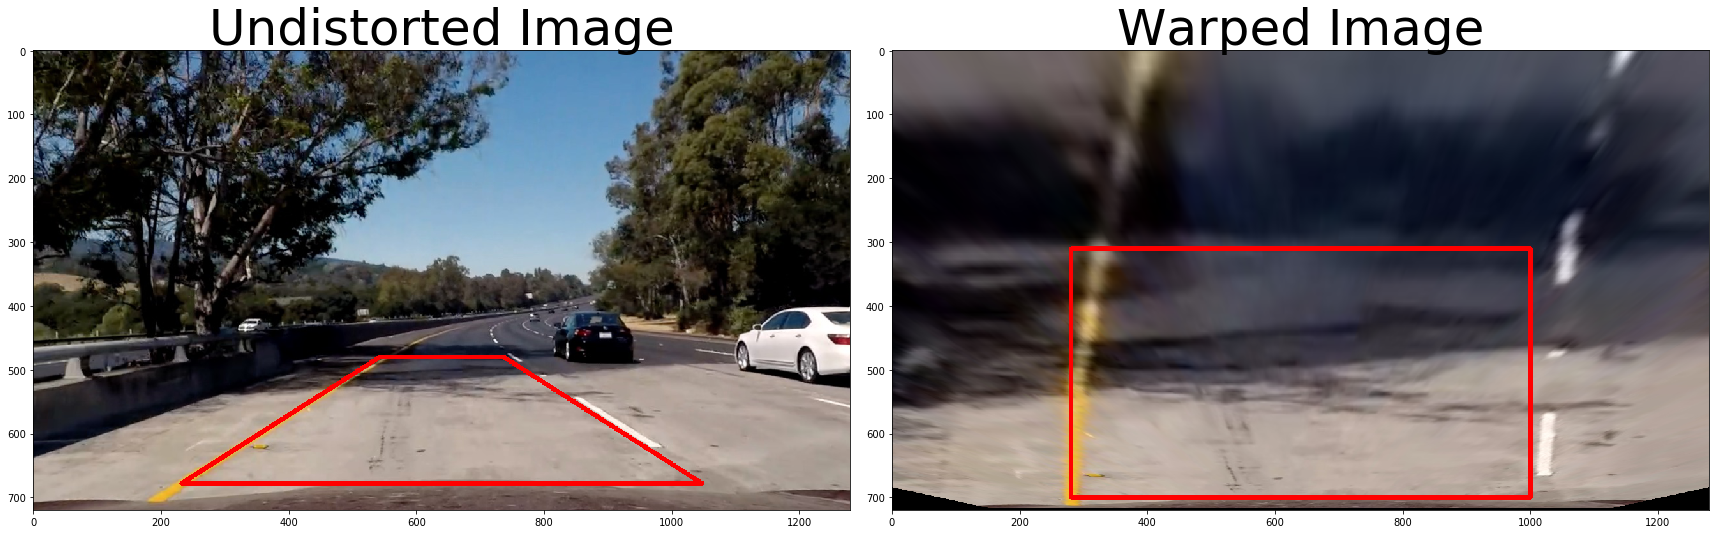

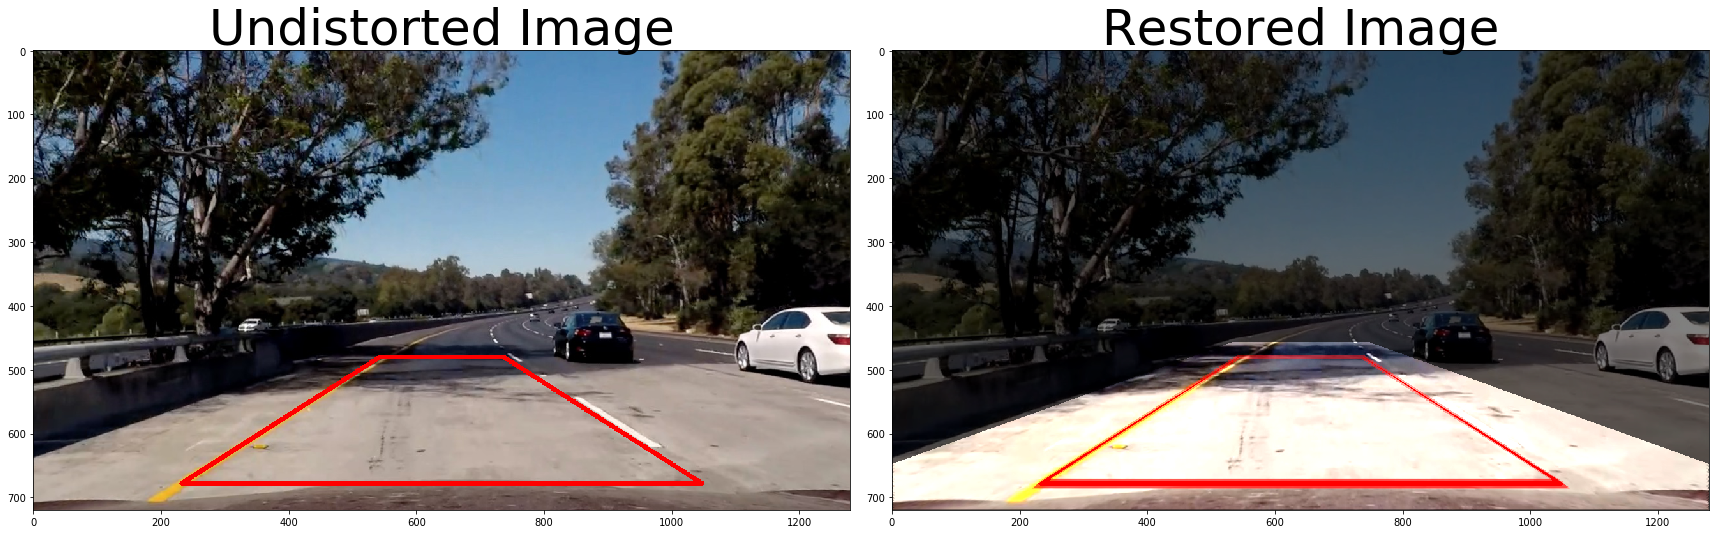

In [30]:
undistorted = undistort_image(mpimg.imread("test_images/test2.jpg"))
warped = warp_image(undistorted, M)
draw_polygon(undistorted, src)
draw_polygon(warped, dst)
show_two_images(undistorted, "Undistorted Image", warped, "Warped Image")


undistorted = undistort_image(mpimg.imread("test_images/test3.jpg"))
warped = warp_image(undistorted, M)
draw_polygon(undistorted, src)
draw_polygon(warped, dst)
show_two_images(undistorted, "Undistorted Image", warped, "Warped Image")

undistorted = undistort_image(mpimg.imread("test_images/test4.jpg"))
warped = warp_image(undistorted, M)
draw_polygon(undistorted, src)
draw_polygon(warped, dst)
show_two_images(undistorted, "Undistorted Image", warped, "Warped Image")


undistorted = undistort_image(mpimg.imread("test_images/test5.jpg"))
warped = warp_image(undistorted, M)
draw_polygon(undistorted, src)
draw_polygon(warped, dst)
show_two_images(undistorted, "Undistorted Image", warped, "Warped Image")

show_two_images(undistorted, "Undistorted Image", cv2.addWeighted(undistorted, 0.5, warp_image(warped, Minv), 1, 0), "Restored Image")